In [13]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume_ov,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,
2010,822300.0,1.334830e+09,0,0,0.000000,2010
2011,869000.0,1.422465e+09,0,0,0.000000,2011
2012,903900.0,1.508990e+09,0,0,0.000000,2012
2013,979300.0,1.607336e+09,0,0,0.000000,2013
2014,1072100.0,1.717947e+09,0,0,0.000000,2014
2015,1224900.0,1.777998e+09,0,0,0.000000,2015
2016,1102000.0,1.735985e+09,0,0,0.000000,2016
2017,1070500.0,1.831167e+09,0,0,0.000000,2017
2018,1082000.0,2.008434e+09,0,0,0.000000,2018


Estimated COVID-19 effect: -652194 ± 123942 (95% confidence)


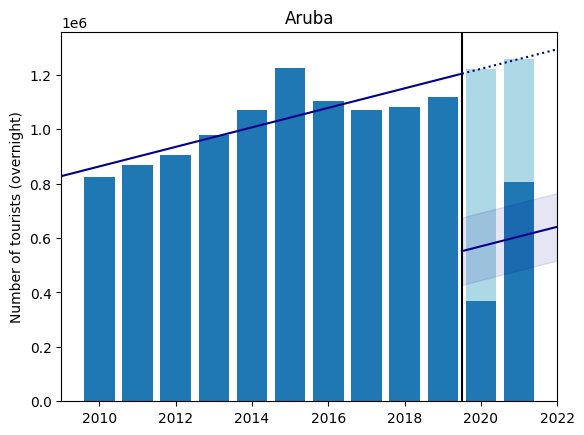

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.956
Model:                              OLS   Adj. R-squared:                  0.940
Method:                   Least Squares   F-statistic:                     58.18
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           8.92e-06
Time:                          02:58:24   Log-Likelihood:                 16.071
No. Observations:                    12   AIC:                            -24.14
Df Residuals:                         8   BIC:                            -22.20
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
# Set up plot
plt.title('Aruba')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -1074224700 ± 57920766 (95% confidence)


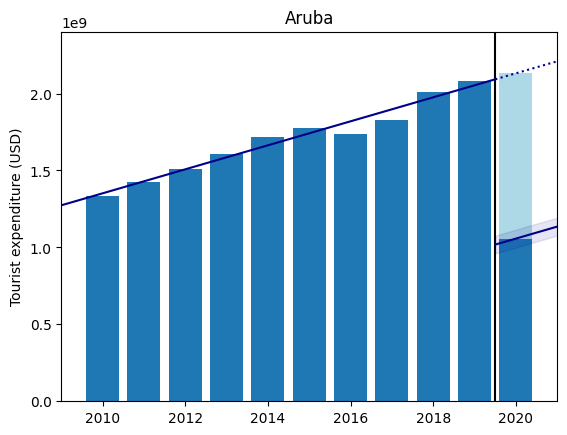

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.978
Method:                  Least Squares   F-statistic:                     223.1
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           9.63e-08
Time:                         02:58:50   Log-Likelihood:                 25.085
No. Observations:                   11   AIC:                            -44.17
Df Residuals:                        8   BIC:                            -42.98
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -72.0617      6.434 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
# Set up plot
plt.title('Aruba')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2021)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)